In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense
from keras import backend as K
import tensorflow as tf

from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
path="C:/Users/rmcm6/OneDrive/Desktop/Jupyter/Data/UCI HAR Dataset/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))

561


In [3]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features

test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)
test_df.columns = features

train_df.shape

(7351, 561)

In [4]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [5]:
mean = train_df.mean(axis=0)
train_df -= mean
std = train_df.std(axis=0)
train_df /= std
test_df -= mean
test_df /= std

In [6]:
input_shape = train_df.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(150, activation='relu')(inputs)
encoded = Dense(2, activation='relu')(encoded)

#Decoder
decoded = Dense(150, activation='relu')(encoded)
decoded = Dense(input_shape)(decoded)


#Model setup, summary and compilation
autoencoder = Model(inputs, decoded)
autoencoder.summary()
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense (Dense)                (None, 150)               84300     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
_________________________________________________________________
dense_2 (Dense)              (None, 150)               450       
_________________________________________________________________
dense_3 (Dense)              (None, 561)               84711     
Total params: 169,763
Trainable params: 169,763
Non-trainable params: 0
_________________________________________________________________


In [7]:
batch_size = 32
epochs = 100

history = autoencoder.fit(
    train_df,
    train_df,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/100
184/184 [==============================] - 1s 5ms/step - loss: 0.6379 - accuracy: 0.0024 - val_loss: 0.3689 - val_accuracy: 0.0000e+00
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.0020 - val_loss: 0.3511 - val_accuracy: 0.0000e+00
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.0070 - val_loss: 0.3360 - val_accuracy: 0.0102
Epoch 4/100
184/184 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.0119 - val_loss: 0.3185 - val_accuracy: 0.0136
Epoch 5/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.0146 - val_loss: 0.3118 - val_accuracy: 0.0143
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3882 - accuracy: 0.0139 - val_loss: 0.3130 - val_accuracy: 0.0156
Epoch 7/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.0168 - val_loss: 0.3078 - val_accuracy

Epoch 58/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.0624 - val_loss: 0.3049 - val_accuracy: 0.0374
Epoch 59/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.0604 - val_loss: 0.3058 - val_accuracy: 0.0333
Epoch 60/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.0605 - val_loss: 0.3036 - val_accuracy: 0.0428
Epoch 61/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.0643 - val_loss: 0.3049 - val_accuracy: 0.0381
Epoch 62/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.0641 - val_loss: 0.3067 - val_accuracy: 0.0333
Epoch 63/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.0631 - val_loss: 0.3040 - val_accuracy: 0.0421
Epoch 64/100
184/184 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.0655 - val_loss: 0.3044 - val_accuracy:

In [8]:
y_predictions = autoencoder.predict(train_df)
variance = []
from sklearn.metrics import explained_variance_score
variance.append(explained_variance_score(train_df, y_predictions, multioutput='uniform_average'))
variance

[0.6873419597591531]

In [9]:
for i in range(5, 101, 5):
    #Encoder
    encoded = Dense(150, activation='relu')(inputs)
    encoded = Dense(i, activation='relu')(encoded)

    #Decoder
    decoded = Dense(150, activation='relu')(encoded)
    decoded = Dense(input_shape)(decoded)


    #Model setup, summary and compilation
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())
    
    history = autoencoder.fit(
        train_df,
        train_df,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )
    
    y_predictions = autoencoder.predict(train_df)
    variance.append(explained_variance_score(train_df, y_predictions, multioutput='uniform_average'))
    
variance

[0.6873419597591531,
 0.7486836723851312,
 0.7936965559111634,
 0.8285597153947494,
 0.8446816624969178,
 0.85648126441391,
 0.8656060716879437,
 0.8665683614711504,
 0.8864874555616371,
 0.8948806422807887,
 0.8995931399700996,
 0.9033980101986439,
 0.8974709368042809,
 0.9114031823760765,
 0.9088264264824907,
 0.9163586707716032,
 0.9243470053074379,
 0.9221903624491504,
 0.9254757558104661,
 0.9294260557543936,
 0.9256066012555794]

In [63]:
axes = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#axes = np.transpose(axes)

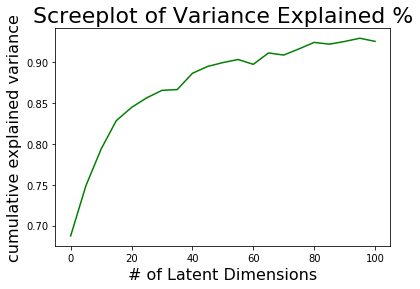

In [42]:
plt.plot(axes, variance, color='green')
#plt.xticks(np.arange(0, 101, 5.0))
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of Latent Dimensions', fontsize=16)
plt.ylabel('cumulative explained variance',fontsize=16);
plt.show()

In [21]:
y_predictions = pd.DataFrame(y_predictions)
y_predictions.columns = features

In [22]:
y_predictions.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.205031,-0.049491,-0.264526,-0.896718,-0.954234,-0.817189,-0.916428,-0.931982,-0.808257,-0.847370,...,0.157606,-0.811387,-0.759341,-0.031359,0.155494,-0.846725,1.189105,-0.755317,0.322523,-0.077102
1,-0.142195,0.008684,-0.449892,-0.890025,-0.906387,-0.788759,-0.909730,-0.879288,-0.784053,-0.841495,...,0.651031,-0.792140,-0.637964,-0.031389,-0.172988,-0.410005,1.024111,-0.560617,0.465417,0.150324
2,-0.184559,0.021181,-0.306546,-0.878782,-0.959444,-0.833930,-0.897507,-0.934371,-0.840101,-0.834938,...,0.702340,0.537255,0.608240,0.042242,-0.230281,0.516716,-0.705772,-0.809422,0.287934,-0.224806
3,-0.048444,-0.004043,-0.233013,-0.858038,-0.971388,-0.910411,-0.876270,-0.941098,-0.905728,-0.813767,...,0.030056,-0.425170,-0.424662,-0.064541,-0.082188,0.302715,-1.151076,-0.591775,0.365401,-0.185747
4,-0.194333,-0.016134,-0.015768,-0.868557,-0.985059,-0.929562,-0.884318,-0.958926,-0.928244,-0.862064,...,-0.743608,-0.534762,-0.670035,-0.119046,0.085918,0.187269,-0.525905,-0.592073,0.340281,-0.097062


In [18]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(train_df)
pca2 = PCA(n_components=150, whiten=True)
pca2.fit(train_df)
X_r = pca2.transform(train_df)

In [19]:
columns=[]
for i in range(0,100):
#     name=
#     print(name)
    columns.append("principal component "+str(i))
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
principalDf.head(5)

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 90,principal component 91,principal component 92,principal component 93,principal component 94,principal component 95,principal component 96,principal component 97,principal component 98,principal component 99
0,-15.297372,1.387788,-0.684190,2.813328,4.257661,-2.069794,0.012642,-1.851527,0.491788,-0.184541,...,0.073205,-0.323874,-1.084184,0.386474,0.830580,0.235562,-0.328927,1.275783,0.582509,-0.498260
1,-15.138159,2.473937,-1.757947,3.717370,4.176256,-1.372312,0.075966,-1.394021,0.539109,-0.677647,...,-0.306730,-0.079504,0.632789,0.021377,0.024765,-0.134171,0.461737,0.058142,-0.150966,1.297746
2,-15.352113,3.916346,-1.790781,2.566877,3.202057,-0.954138,0.531804,-1.838664,1.071796,-1.503998,...,0.458087,-0.664469,-1.256034,-0.054383,0.980464,-0.381884,0.741717,-0.426422,0.601232,0.695894
3,-15.545978,4.598493,-2.188012,2.898001,3.081503,-1.074644,-1.046293,-0.827607,0.597155,1.112915,...,0.320032,0.071690,-0.727274,0.511113,-0.323404,0.095702,-0.535133,0.658272,-0.079851,0.323950
4,-15.360394,4.725209,-2.433259,2.527328,2.236100,-0.901836,-1.645177,0.735235,0.607449,1.486750,...,0.840217,0.510237,-0.176438,-0.206280,0.500341,0.235248,-1.206952,0.142993,-0.263393,0.832658


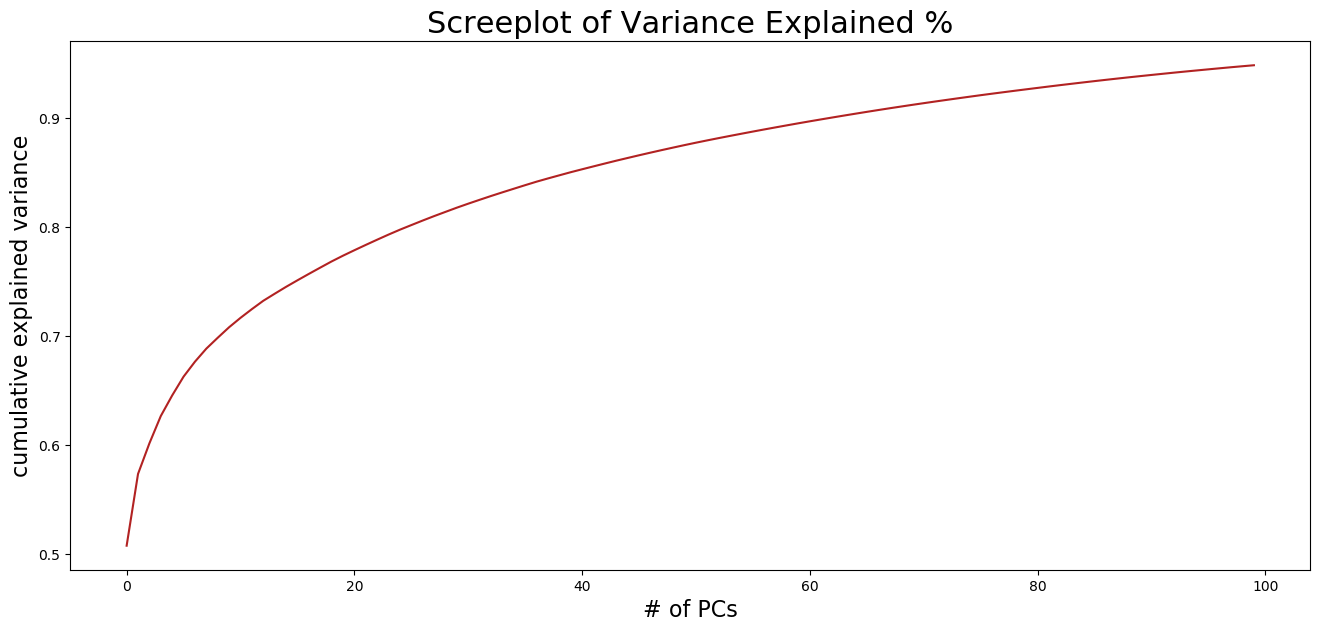

In [20]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum()
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.ylabel('cumulative explained variance',fontsize=16);
plt.show()

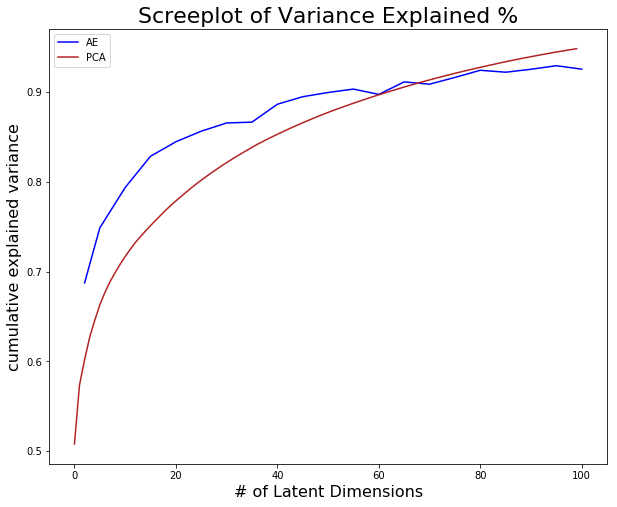

In [64]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
plt.plot(axes, variance, color='blue', label='AE')
plt.plot(variance_exp_cumsum, color='firebrick', label='PCA')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of Latent Dimensions', fontsize=16)
plt.ylabel('cumulative explained variance',fontsize=16);
plt.legend()
plt.show()